# abalone

Ring >= 9인지 아닌지 Classfication

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/anchanghun/Downloads/abalone.csv")

In [2]:
df.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [4]:

from sklearn.preprocessing import LabelEncoder

# Label Encoding 적용
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# 인코딩된 데이터프레임 확인
print(df.head())

   id  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0   0    2   0.455     0.365   0.095        0.5140          0.2245   
1   1    2   0.350     0.265   0.090        0.2255          0.0995   
2   2    0   0.530     0.420   0.135        0.6770          0.2565   
3   3    2   0.440     0.365   0.125        0.5160          0.2155   
4   4    1   0.330     0.255   0.080        0.2050          0.0895   

   Viscera_weight  Shell_weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


In [5]:
df[df['Rings']<=9]['Rings'].count()

2096

In [6]:
df[df['Rings']>9]['Rings'].count()

2081

In [7]:
df['Rings'] = df['Rings'].apply(lambda x: 0 if x <=9 else 1)

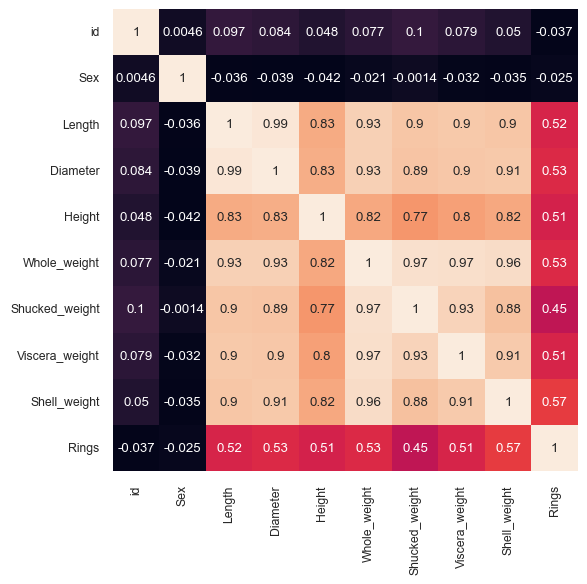

In [8]:

df_corr=df.corr()

#히트맵
plt.figure(figsize=(6,6))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [9]:
df = df.drop(labels='id', axis=1)
df =df.drop(labels='Sex', axis=1)

In [10]:
y = df['Rings']

In [11]:
X=df.drop(labels='Rings', axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler
# 특성 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [14]:
X.shape

(4177, 7)

In [15]:
print(y)

0       1
1       0
2       0
3       1
4       0
       ..
4172    1
4173    1
4174    0
4175    1
4176    1
Name: Rings, Length: 4177, dtype: int64


In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(7,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))


model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 229 (916.00 Byte)
Trainable params: 229 (916.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
epochs = 30
model_history=model.fit(x=X_train, y=y_train, epochs=epochs, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)


Epoch 1/30
105/105 [==============================] - 0s 1ms/step - loss: 0.5518 - accuracy: 0.7414 - val_loss: 0.5005 - val_accuracy: 0.7632
Epoch 2/30
105/105 [==============================] - 0s 424us/step - loss: 0.5048 - accuracy: 0.7576 - val_loss: 0.4716 - val_accuracy: 0.7847
Epoch 3/30
105/105 [==============================] - 0s 417us/step - loss: 0.4810 - accuracy: 0.7722 - val_loss: 0.4556 - val_accuracy: 0.7931
Epoch 4/30
105/105 [==============================] - 0s 416us/step - loss: 0.4688 - accuracy: 0.7776 - val_loss: 0.4459 - val_accuracy: 0.8002
Epoch 5/30
105/105 [==============================] - 0s 413us/step - loss: 0.4609 - accuracy: 0.7848 - val_loss: 0.4436 - val_accuracy: 0.8110
Epoch 6/30
105/105 [==============================] - 0s 417us/step - loss: 0.4581 - accuracy: 0.7815 - val_loss: 0.4386 - val_accuracy: 0.8062
Epoch 7/30
105/105 [==============================] - 0s 411us/step - loss: 0.4545 - accuracy: 0.7857 - val_loss: 0.4348 - val_accuracy: 0

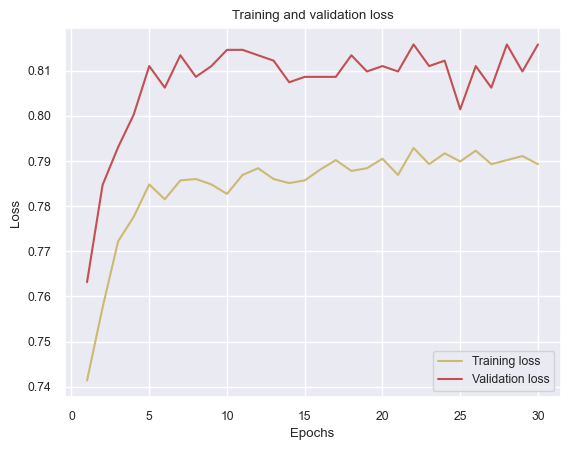

In [18]:


loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

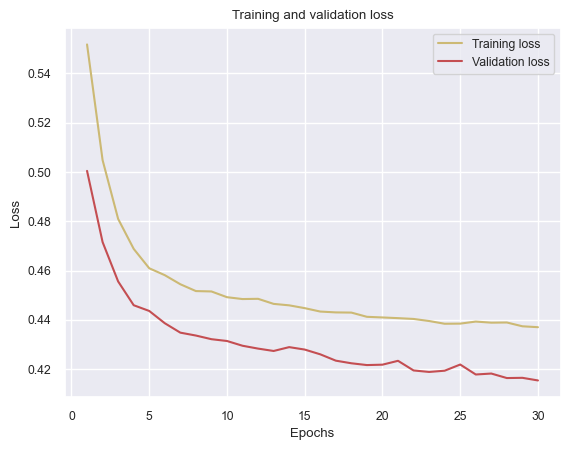

In [19]:


loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
y_test_class = y_test
y_pred_class = y_pred

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict probabilities
y_pred = model.predict(X_test)

# Convert probabilities to class labels (binary classification: 0 or 1)
y_pred_class = (y_pred > 0.5).astype(int)

# Assuming y_test_class is already in discrete class format
# Print classification report and confusion matrix
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

27/27 [==============================] - 0s 458us/step
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       434
           1       0.82      0.79      0.80       402

    accuracy                           0.82       836
   macro avg       0.82      0.81      0.82       836
weighted avg       0.82      0.82      0.82       836

[[366  68]
 [ 86 316]]


In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       434
           1       0.82      0.79      0.80       402

    accuracy                           0.82       836
   macro avg       0.82      0.81      0.82       836
weighted avg       0.82      0.82      0.82       836

[[366  68]
 [ 86 316]]


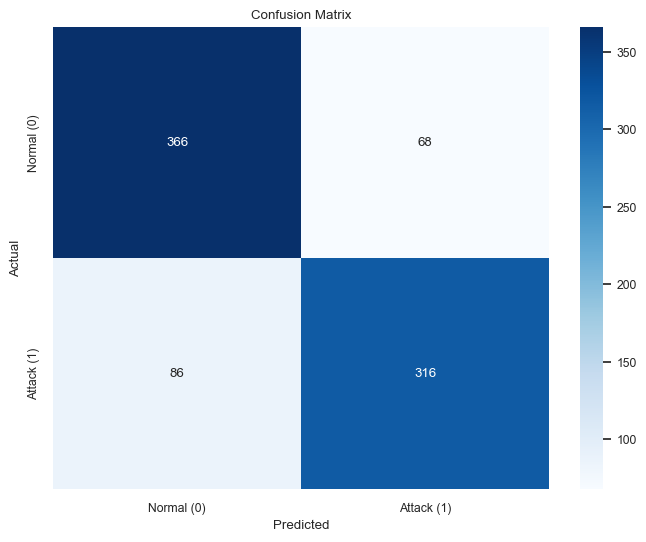

In [24]:
from sklearn.metrics import confusion_matrix

# Confusion matrix 계산
cm = confusion_matrix(y_test_class, y_pred_class)

# Confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal (0)", "Attack (1)"], yticklabels=["Normal (0)", "Attack (1)"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()